In [206]:
# Importacion de librerias 
import numpy as np 
import pandas as pd 

import seaborn as sns 

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

In [207]:
# Carga de datos
df = pd.read_csv('insurance_us.csv')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [209]:
df.columns = [i.lower().replace(" ","_") for i in df.columns]

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [211]:
df.sample(10)

,gender,age,salary,family_members,insurance_benefits
4856,1,21.0,47000.0,2,0
3109,0,35.0,48800.0,0,0
389,1,23.0,44400.0,0,0
192,0,21.0,37600.0,1,0
337,0,20.0,44900.0,2,0
2586,1,32.0,41900.0,2,0
3833,1,29.0,43700.0,1,0
3163,0,23.0,33300.0,1,0
1006,0,27.0,54200.0,1,0
4059,1,35.0,40000.0,2,0


In [212]:
df = df.astype({'age':'int', 'salary':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   salary              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_benefits  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [213]:
df.describe()

,gender,age,salary,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Puede ser que los datos necesiten ser normalizados para utilizarlos en un modelo predictivo. Asimismo revisar valores atipicos en columnas como salary e insurance.

# Análisis Exploratorio 

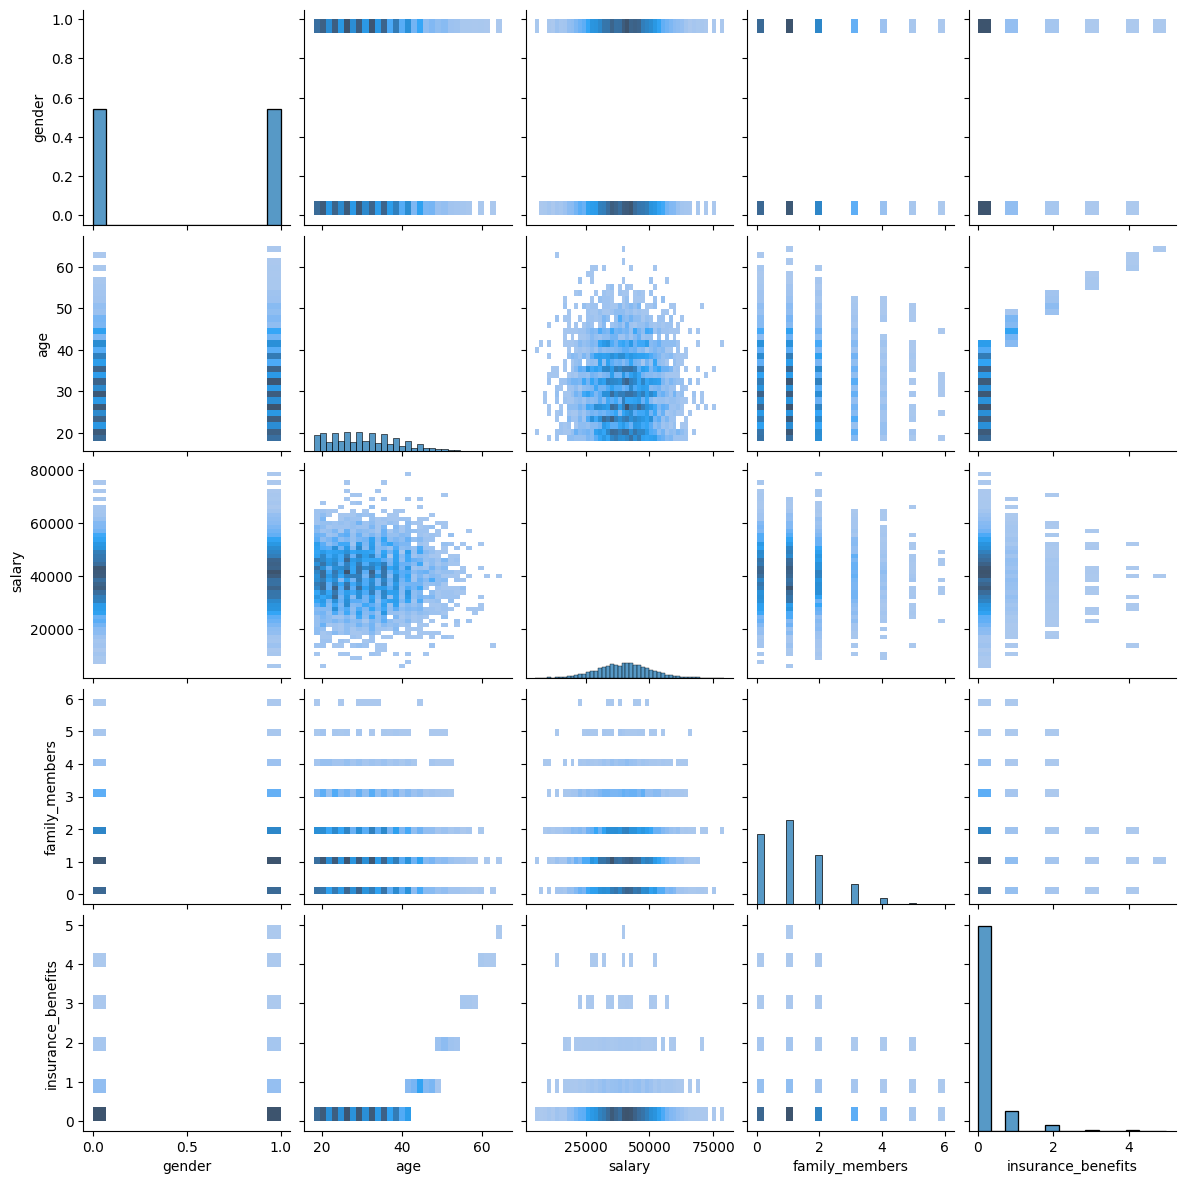

In [214]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12,12)

## 1. Clientes Similares

In [215]:
feature_names = df.columns.tolist()
feature_names.remove('insurance_benefits')

In [216]:
def get_knn(df, n, k, metric):
    """
    Devuelve los k vecinos mas cercanos 

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentor del mismo lugar
    :param n: nuemro de objetos para los que se buscan los vecinos mas cercanos
    :param k: numero de vecinos mas cercanos a devolver 
    :param metric: nombre de la metrica de distancia
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric).fit(df[feature_names])


    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance = True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, 
        index = nbrs_indices[0], 
        columns=['distance'])],
        axis =1)

    return df_res

**Escalado de datos**

In [217]:
# Escalamiento de datos 
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:,feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\lloyd\AppData\Local\Temp\ipykernel_32076\1081988865.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:,feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\lloyd\AppData\Local\Temp\ipykernel_32076\1081988865.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6278481  0.48101266 0.26582278 ... 0.42911392 0.41392405 0.51392405]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:,feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\lloyd\AppData\Local\Temp\ipykernel_32076\1081988865.py:5: FutureWarning: Setting an item of incompatible dtype is depre

In [218]:
df_scaled.sample(5)

,gender,age,salary,family_members,insurance_benefits
3145,0,0.400000,0.515190,0.666667,0
3254,0,0.707692,0.310127,0.166667,1
2474,0,0.323077,0.422785,0.500000,0
924,0,0.476923,0.620253,0.000000,0
656,1,0.292308,0.646835,0.333333,0


**Pruebas para diferentes Metricas y Escalados**

In [219]:
print('Sin escalamiento\n',70*'=')
# Sin escalar, distancia euclideana
print('Euclidean\n')
print(get_knn(df, 0, 5, 'euclidean'),'\n')

# Sin escalar, distancia Manhattan
print('Manhattan\n')
print(get_knn(df, 0, 5, 'manhattan'))


print('\nEscalado\n',70*'=')
# Escalado, distancia euclideana
print('Euclidean\n')
print(get_knn(df_scaled, 0, 5, 'euclidean'),'\n')

# Escalado, distancia Manhattan
print('Manhattan\n')
print(get_knn(df_scaled, 0, 5, 'manhattan'))


Sin escalamiento
Euclidean

      gender  age  salary  family_members  insurance_benefits  distance
0          1   41   49600               1                   0  0.000000
2022       1   41   49600               0                   0  1.000000
1225       0   42   49600               0                   1  1.732051
4031       1   44   49600               2                   1  3.162278
3424       0   38   49600               0                   0  3.316625 

Manhattan

      gender  age  salary  family_members  insurance_benefits  distance
0          1   41   49600               1                   0       0.0
2022       1   41   49600               0                   0       1.0
1225       0   42   49600               0                   1       3.0
4031       1   44   49600               2                   1       4.0
815        1   37   49600               2                   0       5.0

Escalado
Euclidean

      gender       age    salary  family_members  insurance_benefits  dist

C:\Users\lloyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\lloyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\lloyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\lloyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si

## 2. Predicción de Beneficios de Seguro

In [220]:
df['insurance_benefits_recieved'] = df['insurance_benefits'] > 0
df['insurance_benefits_recieved'].value_counts()

insurance_benefits_recieved
False    4436
True      564
Name: count, dtype: int64

**Evaluación del clasificador**

In [221]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')

    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

Modelo Aleatorio

In [222]:
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

for P in [0, df['insurance_benefits_recieved'].sum()/len(df), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')
    
    y_pred_rnd = rnd_model_predict(P, len(df))

    eval_classifier(df['insurance_benefits_recieved'], y_pred_rnd)
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



Modelo kNN

In [223]:
X = df[feature_names]
y = df['insurance_benefits_recieved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

In [224]:
f1_scores = []
for k in range(1,11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(sklearn.metrics.f1_score(y_test,y_pred))

print(f1_scores) 

[0.60431654676259, 0.4056603773584906, 0.4052863436123348, 0.27835051546391754, 0.271356783919598, 0.11428571428571428, 0.11299435028248588, 0.07100591715976332, 0.08235294117647059, 0.0]


## 3. Regresión lineal

In [225]:
class MyLinearRegression: 

    def __init__(self):
        self.weights = None

    def fit(self, X, y):

        # Añadir las unidades 
        X2 = np.append(np.ones([len(X),1]), X, axis=1)
        self.weights  = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X): 
        
        # Añadir las unidades
        X2 = np.append(np.ones([len(X),1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [226]:
def eval_regressor(y_true, y_pred): 
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')

    r2 = sklearn.metrics.r2_score(y_true, y_pred) 
    print(f'R2: {r2:.2f}')

In [227]:
X = df[feature_names].values
y = df['insurance_benefits'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345) 

lr = MyLinearRegression()
lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred) 

[-0.94353893  0.01642727  0.03574955 -0.00000026 -0.01169021]
RMSE: 0.34
R2: 0.43


## 4. Ofuscación de datos

Generación de matriz de ofuscación

In [228]:
personal_info_column_list = ['gender', 'age', 'salary', 'family_members']
df_pn = df[personal_info_column_list]

X = df_pn.values

rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1],X.shape[1]))

In [229]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Ofuscacion de datos 

In [230]:
X_obfuscated = X @ P
X_recovered = X_obfuscated @ np.linalg.inv(P) 

print('Original:\n', X[:5])
print('Obfuscated:\n', X_obfuscated[:5].round(2))

# Mostrar los resultados sin notación científica
np.set_printoptions(suppress=True)

print('Recovered:\n', X_recovered[:5])

Original:
 [[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]]
Obfuscated:
 [[ 6359.72 22380.4  18424.09 46000.7 ]
 [ 4873.29 17160.37 14125.78 35253.46]
 [ 2693.12  9486.4   7808.83 19484.86]
 [ 5345.6  18803.23 15479.15 38663.06]
 [ 3347.18 11782.83  9700.   24211.27]]
Recovered:
 [[    1.    41. 49600.     1.]
 [   -0.    46. 38000.     1.]
 [   -0.    29. 21000.    -0.]
 [   -0.    21. 41700.     2.]
 [    1.    28. 26100.     0.]]


Prueba de Regresión con Datos Ofuscados

In [231]:
X_train_obfuscated = X_train @ P 
X_test_obfuscated = X_test @ P 

lr_obfuscated = MyLinearRegression()
lr_obfuscated.fit(X_train_obfuscated, y_train)
y_test_pred_obfuscated = lr_obfuscated.predict(X_test_obfuscated) 

eval_regressor(y_test, y_test_pred_obfuscated) 

RMSE: 0.34
R2: 0.43


# Conlcusiones

## 1. Clientes Similares 
1. Efecto del Escalado kNN 
    - El escalado de datos afecta significativamente al algoritmo kNN. Cuando los datos no estan escalados, variables con magnitudes mayroes dominan el cálculo de la distancia, esto puede llevar a resultados sesgados. 

2. Comparación entre Métricas de Distancia: 
    - La distancia manhattan tiende a ser mas robusta ante valores atipicos en comparacion a la distancia euclidiana. Esto se debe a que la manhattan no eleva al cuadrado las diferencias, lo que reduce la influencia de valores extremos. 
    - Los resultados entre ambas metricas son similares, sin embargo no identicas. La eleccion de la metrica depende del contexto y de la prescencia de valores atipicos en los datos. 

## 2. Predicción de Beneficio de Seguro 
1. Modelo Aleatorio (Dummy): 
    - El modelo aleatorio con una probablildad igual a la proporción de clientes que reciben beneficios (11%) obtiene un F1-score de 0.12, lo que indica un rendimiento pobre. 

2. Modelo kNN
    - El modelo kNN supero al modelo dummy alcanzando un F1-score máximo de 0.60 para k = 1. Sin embargo, el rendimiento disminuye a medida que aumenta k, lo que sugiere que los vecinos mas cercanos son los más infromativos para este caso. 

3. Desequilibrio de Clases: 
    - El conjunto de datos esta desequilibrado, con solo el 11% de los clientes recibiendo beneficios. Esto afecta negativamente el rendimiento del modelo, ya que tiende a predecir la clase mayoritaria (No recibir beneficios) 

## 3. Regresión Lineal 
1. Implementación de Regresión Lineal:
    - La implementación manual de la reegresión lineal utilizando operaciones matriciales funciona correctamente, con un RMSE de 0.34 y un $R^2$ de 0.43. Esto indica que el modelo explica el 43% de la varianza en los beneficios de seguro. 

## 4. Ofuscación de Datos
1. Ofuscación
    - La ofuscación de datos mediante una matriz invertible P, permite proteger la informacion personal sin afectar la utilidad de los datos para el modelo de regresión lineal. 
    - Los datos originales se recuperan con precisión utilizando la matriz inversa $P^-1$, lo que demuestra que la transforación es reversible. 

2. Impacto en el Modelo
    - La regresión lineal con datos ofuscados produce resultados idénticos en terminos de RECM y $R^2$ en comparación con los datos originales. Esto confima que la ofuscación no afecta la calidad del modelo. 